# Sakila Core

- Create a new repository and notebook for this assignment.
- Using the Sakila database, complete the below queries with Python in your Jupyter Notebook.
    - You can use MySQL Workbench to test your queries and then copy and paste them into your notebook to perform with Pandas and SQLAlchemy.
- You can get the Sakila database and ERD here (sakila-data.sql and sakila-db-model.png), please use these for reference.
    - Tip: you can insert the ERD into your notebook in a Markdown cell using:       
    "! [png ]( - IMAGE_URL_HERE - )"
    
- Replace "IMAGE_URL_HERE" with the link to the ERD above.

### 1. What query would you run to get all the customers inside city_id = 312? Your query should return the customers' first name, last name, email, address, and city.


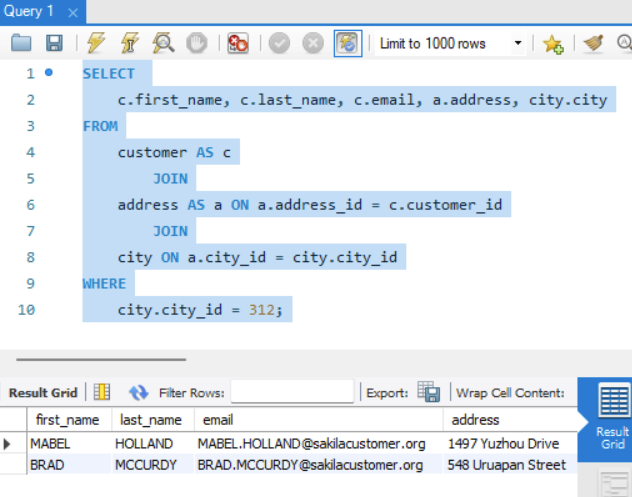

In [ ]:
SELECT 
    c.first_name, c.last_name, c.email, a.address, city.city
FROM
    customer AS c
        JOIN
    address AS a ON a.address_id = c.customer_id
        JOIN
    city ON a.city_id = city.city_id
WHERE
    city.city_id = 312; 
    



### 2. What query would you run to get all comedy films? Note that the genre is called the category in this schema. Your query should return film title, description, release year, rating, and special features.


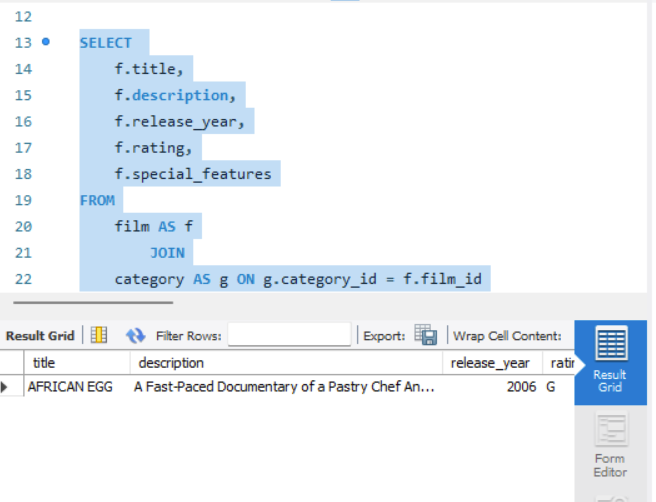

In [ ]:
SELECT 
    f.title,
    f.description,
    f.release_year,
    f.rating,
    f.special_features
FROM
    film AS f
        JOIN
    category AS g ON g.category_id = f.film_id
WHERE
    g.name = 'comedy'; 
    
    

### 3. What query would you run to get all the films that Johnny Lollobrigida was in? Your query should return the actor's last name, film title, and release year.


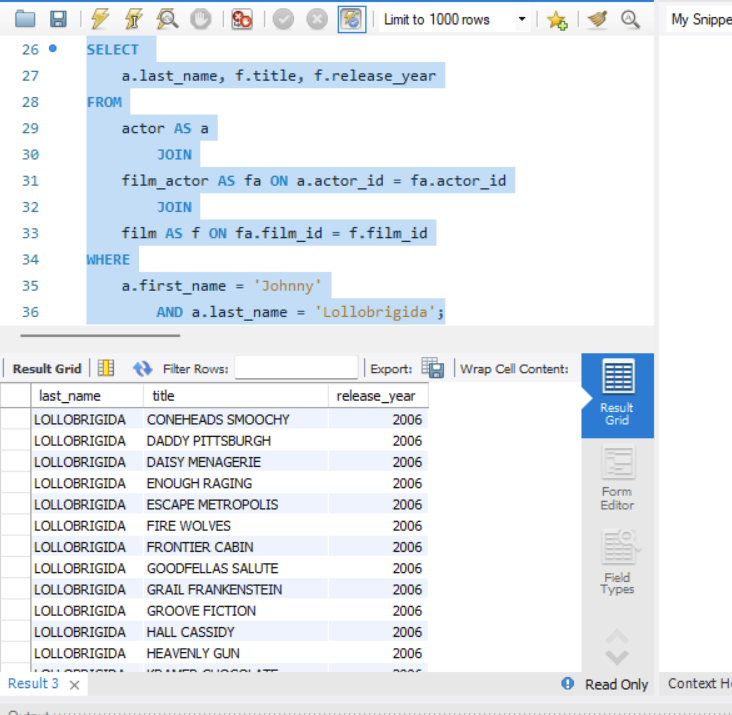

In [ ]:
SELECT 
    a.last_name, f.title, f.release_year
FROM
    actor AS a
        JOIN
    film_actor AS fa ON a.actor_id = fa.actor_id
        JOIN
    film AS f ON fa.film_id = f.film_id
WHERE
    a.first_name = 'Johnny'
        AND a.last_name = 'Lollobrigida';
        
        

### 4. What query would you run to get the first and last names of all the actors in the movie titled "Bingo Talented"?


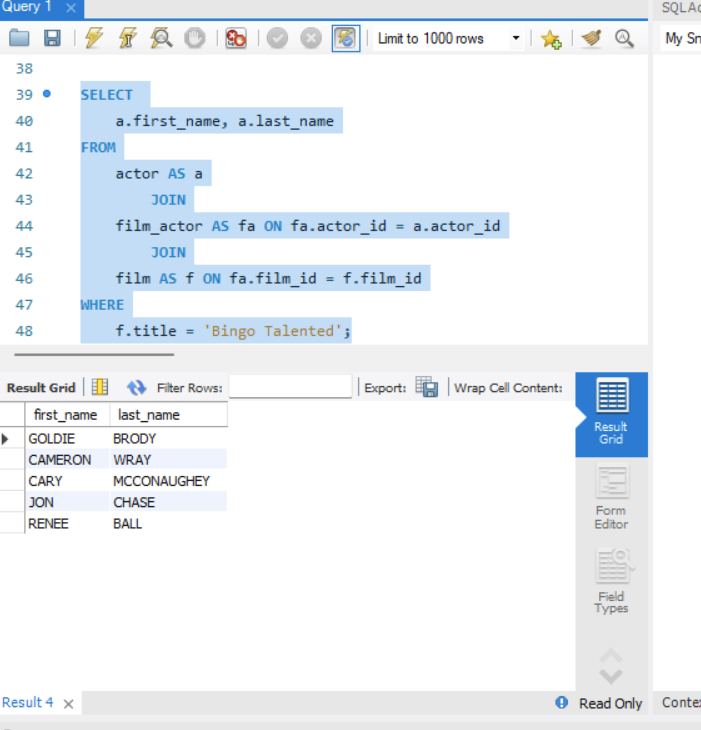

In [ ]:
SELECT 
    a.first_name, a.last_name
FROM
    actor AS a
        JOIN
    film_actor AS fa ON fa.actor_id = a.actor_id
        JOIN
    film AS f ON fa.film_id = f.film_id
WHERE
    f.title = 'Bingo Talented';

### 5. What query would you run to get the customer_id associated with all payments greater than twice the average payment amount? (HINT: use 2* in your query to get twice the amount). Your result should include the customer id and the amount.

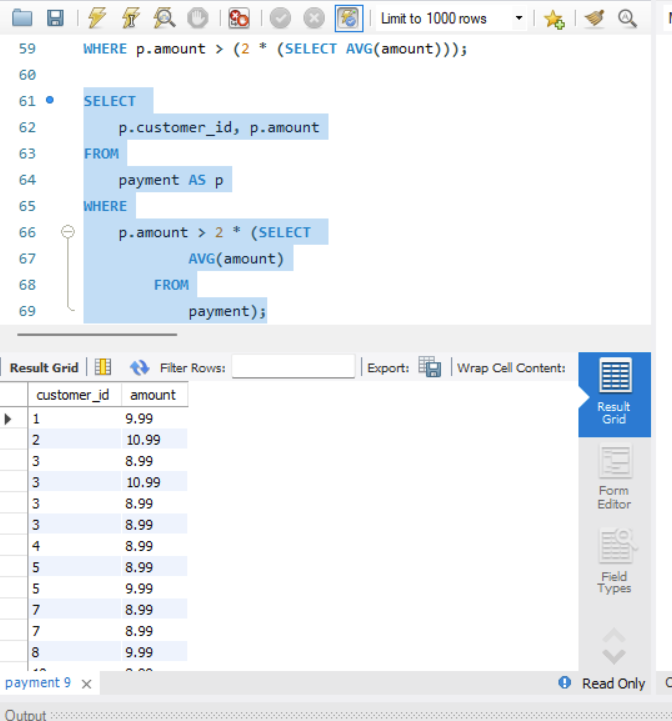

In [ ]:
SELECT 
    p.customer_id, p.amount
FROM
    payment AS p
WHERE
    p.amount > 2 * (SELECT 
            AVG(amount)
        FROM
            payment);

### 6. What query would you run to list the first and last names of the 5 customers who have the highest number(count) of payments? You can title the number of payments as num_payments.

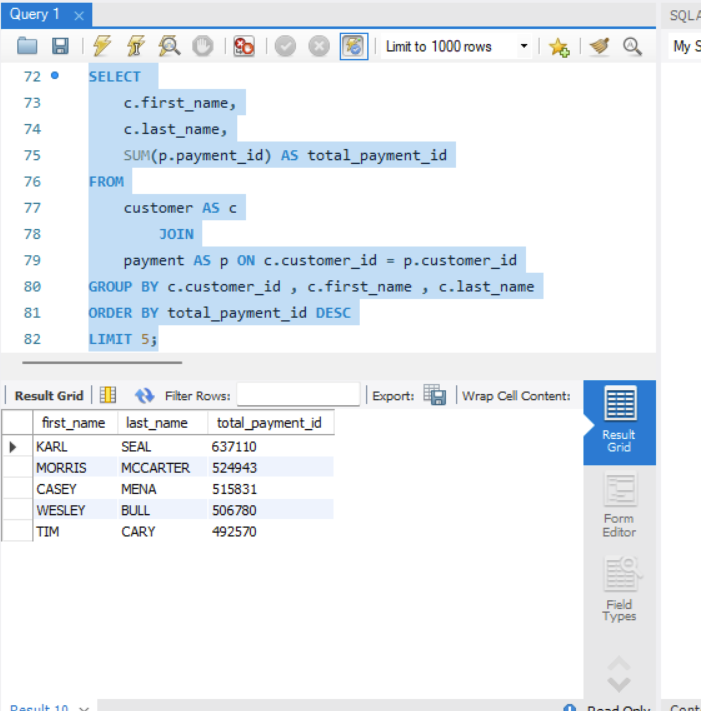

In [ ]:
SELECT 
    c.first_name,
    c.last_name,
    SUM(p.payment_id) AS total_payment_id
FROM
    customer AS c
        JOIN
    payment AS p ON c.customer_id = p.customer_id
GROUP BY c.customer_id , c.first_name , c.last_name
ORDER BY total_payment_id DESC
LIMIT 5;